In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/credit_default_risk.csv')

In [6]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


# KNN

In [7]:
df.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('default', axis=1)
y = df['default']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=19)

In [65]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

## Model Evaluation

In [66]:
pred = knn_model.predict(scaled_X_test)

In [67]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [68]:
accuracy_score(y_test, pred)

0.97

In [69]:
confusion_matrix(y_test, pred)

array([[1923,    8],
       [  52,   17]], dtype=int64)

In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.68      0.25      0.36        69

    accuracy                           0.97      2000
   macro avg       0.83      0.62      0.67      2000
weighted avg       0.96      0.97      0.96      2000



## Using Grid Search

## Creating a pipeline

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [32]:
scaler = StandardScaler()

In [35]:
knn = KNeighborsClassifier()

In [36]:
operations = [('scaler',scaler),('knn',knn)]

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
pipe = Pipeline(operations)

## Applying grid search

In [40]:
from sklearn.model_selection import GridSearchCV

In [59]:
k_values = list(range(20))

In [60]:
param_grid = {'knn__n_neighbors': k_values}

In [61]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy')

In [62]:
full_cv_classifier.fit(X_train, y_train)

C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\danisha.ansari\AppData\Local\anacon

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11, 12, 13, 14, 15, 16, 17, 18,
                                              19]},
             scoring='accuracy')

In [63]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [71]:
full_cv_classifier.cv_results_['mean_test_score']

array([       nan, 0.95949986, 0.96737505, 0.96825022, 0.97112505,
       0.97175006, 0.97200008, 0.97312508, 0.97287501, 0.972625  ,
       0.97287497, 0.97300005, 0.97287501, 0.97350008, 0.97312498,
       0.97325011, 0.97350003, 0.97375014, 0.97362511, 0.97400006])

Text(0, 0.5, 'Accuracy')

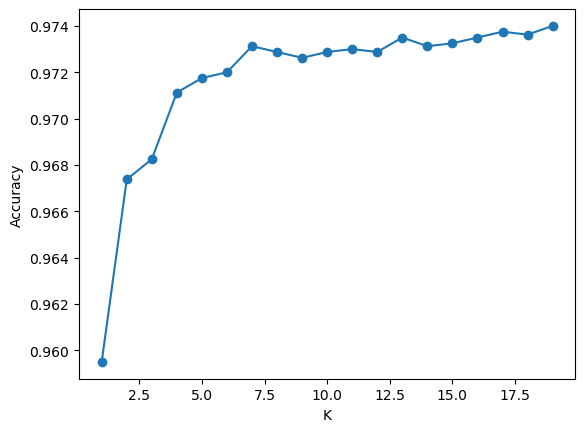

In [72]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")